<h1>Segmentation Example</h1>

In [1]:
# Load segmenting functions
include("C:\\Users\\cmeri\\OneDrive - Dartmouth College\\Math_76\\FinalProject\\Math76_FinalProject\\Julia_Segment.jl")

segment_mask (generic function with 1 method)

<h3>Raster Conversion and Image Creation</h3>

This section demonstates how to create .jpg images from the raw .tiff raster files. Images can be created by combining any three bands from the raster or by creating a normalized difference index using two bands. For these rasters, the Red, Blue, Green, Near-Infrared, and Shortwave Infrared are included. Below we create a vizuale image using the Red, Green, and Blue bands.

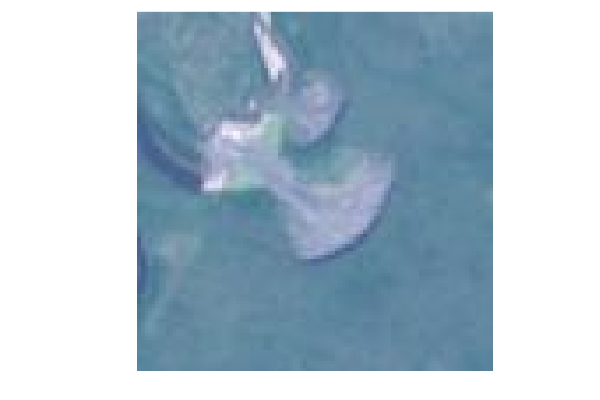

In [2]:
# Select .tif file to display
selected_date = "C:\\Users\\cmeri\\OneDrive - Dartmouth College\\Math_76\\FinalProject\\Math76_FinalProject\\Data\\Sentinel-s002\\Sentinel2_2021-07-24.tif"

# Select Red, Green, and Blue bands from the raster and save as a .jpg image
path = select_bands(selected_date, 1, 2, 3, "RGB.jpg") # 1-Red, 2-Green, 3-Blue image bands

# Load the newly create .jpg image
RGB_image = load(path)

# Plot the image
plot(RGB_image, framestyle=:none)

<h3>Basic Segmenting</h3>
The `count_pixels` function uses seeded segmentation to segment an individual image. Plotting the result for the image above shows that the RGB image is fairly nicely segmented using this algorithm. Later, we use masks to apply the segmentation to many images.

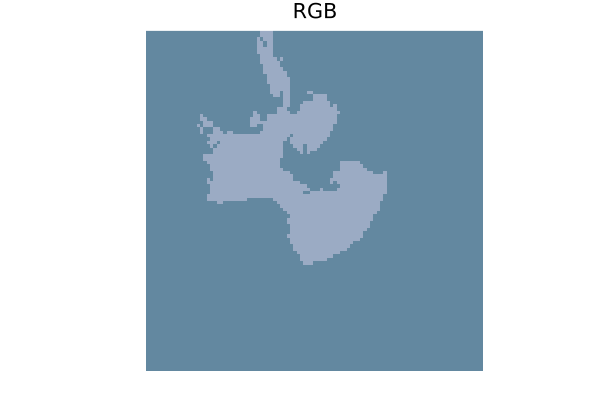

The segemented region contains 1434 pixels.


1434

In [3]:
# Segement the RGB image
count_pixels(path, (58,51), (90,90), Display=true) # Uses two seeds

<h3>Segmenting Time Series</h3>
We can now segment many images for a given hillslope failure over time. The `segment_mask` function first creates a water mask to limit the number of water pixels classified as part of the failure. It then segments each sucessive image, starting with the most recent image. Since the failure should not be larger at earlier times, the function uses a vegetation mask if a poor segmentation results in a larger failure at earlier times. If this happens, the previous image is thresholded to get pixels with low vegetation cover. Then, in the current image, only pixels that also have low vegetation cover within that mask are selected. This ensures that the slump can growth only in the forwards time direction.

The segemented region contains 2112 pixels.
The segemented region contains 1696 pixels.
The segemented region contains 4452 pixels.
The segemented region contains 1592 pixels.
The segemented region contains 1643 pixels.
The segemented region contains 1589 pixels.
The segemented region contains 1834 pixels.
The segemented region contains 1449 pixels.
The segemented region contains 1608 pixels.
The segemented region contains 1729 pixels.
The segemented region contains 1744 pixels.
The segemented region contains 1467 pixels.
The segemented region contains 1467 pixels.
The segemented region contains 1443 pixels.
The segemented region contains 1130 pixels.
The segemented region contains 1153 pixels.
The segemented region contains 1178 pixels.
The segemented region contains 1036 pixels.
The segemented region contains 1351 pixels.
The segemented region contains 1396 pixels.
The segemented region contains 1385 pixels.
The segemented region contains 1325 pixels.
The segemented region contains 1

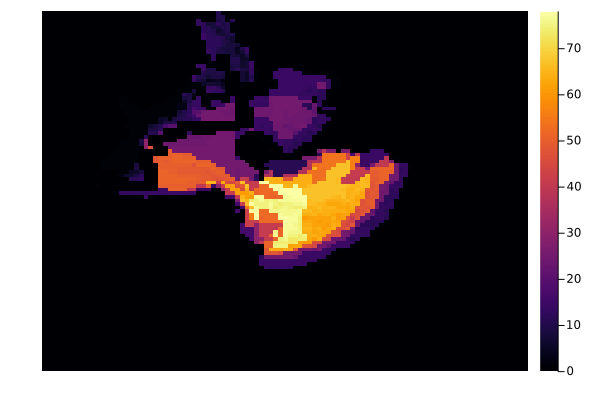

78×2 DataFrame
 Row │ Date        Pixels 
     │ Date        Int64  
─────┼────────────────────
   1 │ 2016-06-07     244
   2 │ 2016-07-10     244
   3 │ 2016-08-06     244
   4 │ 2017-06-02     242
   5 │ 2017-06-09     244
   6 │ 2017-06-30     244
   7 │ 2017-07-12     244
   8 │ 2017-07-19     244
   9 │ 2017-07-20     244
  10 │ 2017-07-27     244
  11 │ 2017-08-09     244
  ⋮  │     ⋮         ⋮
  69 │ 2023-07-29    1463
  70 │ 2023-08-08    1452
  71 │ 2023-09-17    1239
  72 │ 2024-06-03    1362
  73 │ 2024-06-10    1346
  74 │ 2024-06-15    1366
  75 │ 2024-06-23    1402
  76 │ 2024-07-12    1041
  77 │ 2024-07-23    1696
  78 │ 2024-08-06    2112
           57 rows omitted

In [4]:
data_path = "C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s002"
result = segment_mask(data_path,(58,51),(90,90),Seed3=(5,5),Display=true,ndvi_threshold=0.5,ndwi_threshold=0.65,ndwi_image="Sentinel2_2016-06-07.tif")

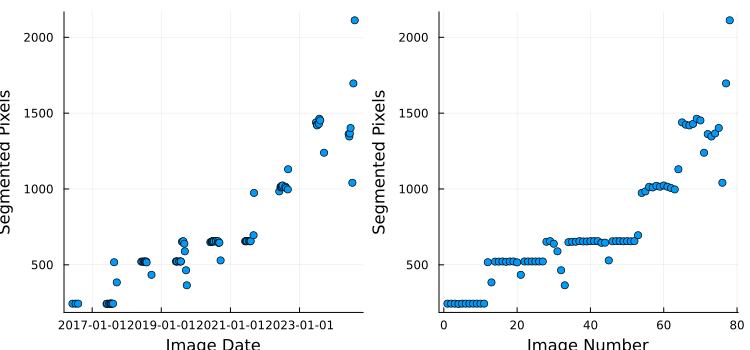

In [5]:
layout = @layout [a b]
p1 = plot(result.Date, result.Pixels, xlabel="Image Date", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter)
p2 = plot(result.Pixels, xlabel="Image Number", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter)
plot(p1, p2, layout=layout, size=(750, 350))

In [6]:
preview("C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s003/RGB/RGB_2023-07-04.jpg")

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(Ptr{GObject} @0x00…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), RGB…

The segemented region contains 343 pixels.
The segemented region contains 299 pixels.
The segemented region contains 272 pixels.
The segemented region contains 378 pixels.
The segemented region contains 381 pixels.
The segemented region contains 337 pixels.
The segemented region contains 323 pixels.
The segemented region contains 242 pixels.
The segemented region contains 235 pixels.
The segemented region contains 258 pixels.
The segemented region contains 260 pixels.
The segemented region contains 1714 pixels.
The segemented region contains 314 pixels.
The segemented region contains 305 pixels.
The segemented region contains 311 pixels.
The segemented region contains 178 pixels.
The segemented region contains 213 pixels.
The segemented region contains 258 pixels.
The segemented region contains 370 pixels.
The segemented region contains 316 pixels.
The segemented region contains 1482 pixels.
The segemented region contains 340 pixels.
The segemented region contains 339 pixels.
The segem

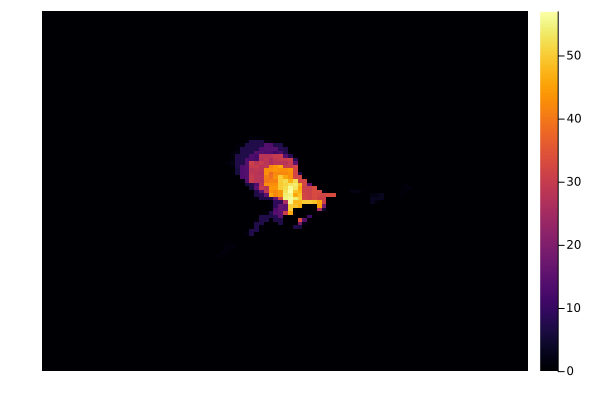

61×2 DataFrame
 Row │ Date        Pixels 
     │ Date        Int64  
─────┼────────────────────
   1 │ 2016-06-02      16
   2 │ 2016-06-22      21
   3 │ 2016-08-07      21
   4 │ 2016-09-23      21
   5 │ 2017-07-28      21
   6 │ 2018-06-03       0
   7 │ 2018-06-17      21
   8 │ 2018-06-22      68
   9 │ 2018-07-03      76
  10 │ 2018-07-13      75
  11 │ 2018-07-23      76
  ⋮  │     ⋮         ⋮
  52 │ 2023-06-07     146
  53 │ 2023-06-12     235
  54 │ 2023-07-04     242
  55 │ 2023-07-17     242
  56 │ 2023-08-01     240
  57 │ 2023-08-06     234
  58 │ 2023-09-09     220
  59 │ 2024-06-23     272
  60 │ 2024-07-11     299
  61 │ 2024-08-07     343
           40 rows omitted

In [7]:
data_path = "C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/FinalProject/Math76_FinalProject/Data/Sentinel-s003"
result = segment_mask(data_path,(48,50),(90,90),Seed3=(5,5),Display=true,ndvi_threshold=0.5,ndwi_threshold=0.65,ndwi_image="Sentinel2_2016-06-22.tif")

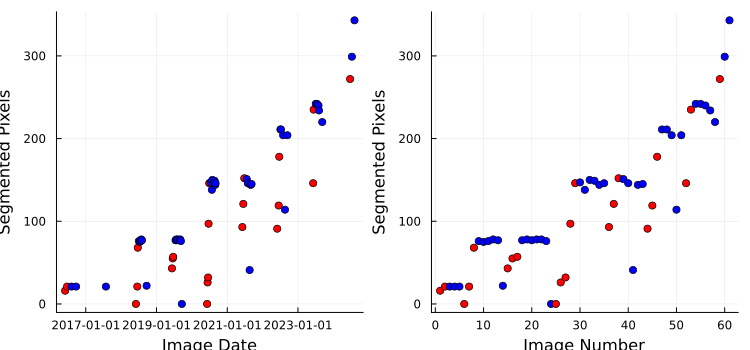

In [8]:
# Dates in June tend to be snow covered
june_test = month.(result.Date) .== 6

colors = Vector{Symbol}(undef, length(result.Date)) 
colors[june_test] .= :red  # Assign red to the points in June
colors[.!june_test] .= :blue  # Assign blue to other points

layout = @layout [a b]
p1 = plot(result.Date, result.Pixels, xlabel="Image Date", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter, color=colors)
p2 = plot(result.Pixels, xlabel="Image Number", ylabel="Segmented Pixels", label=nothing, seriestype=:scatter, color=colors)
plot(p1, p2, layout=layout, size=(750, 350))

Much of the noise in the segmentation results can be attributed to dates early or late in the season when snow cover makes the slumps appear smaller than during the warmer parts of the year.